In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [27]:
WEATHER_FILE = 'data/weather/los_angeles_weather_2000_2018.csv'
POLLUTANT_FILE = 'data/pm25/los_angeles_pm25_2016_2018.csv'

In [28]:
df = pd.read_csv(WEATHER_FILE)

In [29]:
df.head()

,DATE,STATION,DATE.1,SLP,WND,TMP,DEW
0,2000-01-01 00:00:00,72295023174,2000-01-01 00:00:00,"10167,5","240,5,N,0057,5","+0130,5","+0000,1"
1,2000-01-01 00:50:00,72295023174,2000-01-01 00:50:00,"10169,5","260,5,N,0046,5","+0122,5","+0078,5"
2,2000-01-01 01:00:00,72295023174,2000-01-01 01:00:00,"99999,9","999,9,9,9999,9","+9999,9","+9999,9"
3,2000-01-01 01:50:00,72295023174,2000-01-01 01:50:00,"10171,5","280,5,N,0046,5","+0128,5","+0083,5"
4,2000-01-01 02:00:00,72295023174,2000-01-01 02:00:00,"99999,9","999,9,9,9999,9","+9999,9","+9999,9"


In [30]:
df['DATE'] = pd.to_datetime(df.DATE)
df['DATE'] = df['DATE'].dt.round('1h')
df = df.set_index(df.DATE)

In [31]:
variables = ['SLP', 'TMP', 'DEW']
for col in variables:
    df[col][~(df[col].str.endswith(',5', ',1'))] = 'nan'
    df[col] = df[col].str.replace(',5', '')
    df[col] = df[col].str.replace(',1', '')
    df[col] = df[col].astype(float)

/home/rmsare/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
df['DIR'] = df.WND.str[0:3].astype(float)
df['DIR'][df.DIR == 999] = np.nan
df['SPD'] = df.WND.str[8:12].astype(float)
df['SPD'][df.SPD == 9999] = np.nan

/home/rmsare/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/rmsare/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [33]:
df['MONTH'] = df.index.month
df['HOUR'] = df.index.hour
df['DOW'] = df.index.dayofweek

In [34]:
df = df[['SLP', 'SPD', 'DIR', 'TMP', 'DEW', 'MONTH', 'HOUR', 'DOW']]

In [35]:
df.head()

,SLP,SPD,DIR,TMP,DEW,MONTH,HOUR,DOW
DATE,,,,,,,,
2000-01-01 00:00:00,10167.0,57.0,240.0,130.0,NaN,1,0,5
2000-01-01 01:00:00,10169.0,46.0,260.0,122.0,78.0,1,1,5
2000-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,1,1,5
2000-01-01 02:00:00,10171.0,46.0,280.0,128.0,83.0,1,2,5
2000-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,1,2,5


In [36]:
df.to_csv(WEATHER_FILE.replace('.csv', '_cleaned.csv'))

[Text(0, 0, 'SLP'),
 Text(0, 0, 'SPD'),
 Text(0, 0, 'DIR'),
 Text(0, 0, 'TMP'),
 Text(0, 0, 'DEW'),
 Text(0, 0, 'MONTH'),
 Text(0, 0, 'HOUR'),
 Text(0, 0, 'DOW')]

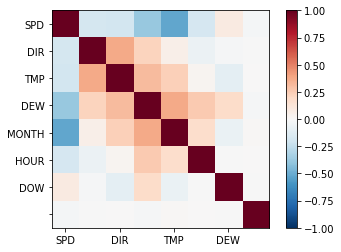

In [37]:
im = plt.imshow(df.corr(), cmap='RdBu_r', vmin=-1, vmax=1)
cb = plt.colorbar(im)
ax = plt.gca()
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)

In [38]:
df2 = pd.read_csv(POLLUTANT_FILE)

In [39]:
df2['date'] = df2['Date Local'] + ' ' + df2['Time Local']

In [40]:
df2 = df2.set_index(pd.to_datetime(df2.date))

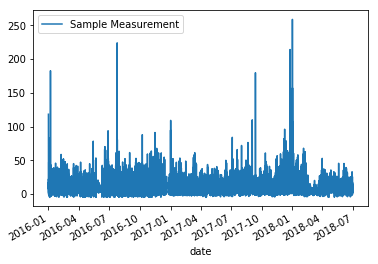

In [41]:
df2.plot(y='Sample Measurement')

In [42]:
df2 = df2[['Sample Measurement']]
df2.columns = ['PM25']

In [43]:
df.tail()

,SLP,SPD,DIR,TMP,DEW,MONTH,HOUR,DOW
DATE,,,,,,,,
2018-12-01 20:00:00,10149.0,62.0,260.0,172.0,61.0,12,20,5
2018-12-01 21:00:00,10139.0,67.0,250.0,172.0,78.0,12,21,5
2018-12-01 22:00:00,10136.0,82.0,270.0,167.0,83.0,12,22,5
2018-12-01 23:00:00,10133.0,88.0,260.0,172.0,50.0,12,23,5
2018-12-02 00:00:00,10123.0,72.0,280.0,172.0,83.0,12,0,6


In [44]:
df2.head()

,PM25
date,
2016-01-01 00:00:00,118.4
2016-01-01 01:00:00,117.4
2016-01-01 02:00:00,101.0
2016-01-01 03:00:00,73.2
2016-01-01 04:00:00,53.0


In [45]:
df = df[~df.index.duplicated(keep='first')]

In [46]:
df2 = df2[~df2.index.duplicated(keep='first')]
df2 = df2[['PM25']]

In [47]:
df3 = pd.concat([df, df2], axis=1)

In [ ]:
df3['DOW'] = df3.index.dayofweek
df3['HOUR'] = df3.index.hour
df3['MONTH'] = df3.index.month

In [49]:
df3.to_csv('data/los_angeles_weather_pm25.csv')

In [50]:
df3.head()

,SLP,SPD,DIR,TMP,DEW,MONTH,HOUR,DOW,PM25
2000-01-01 00:00:00,10167.0,57.0,240.0,130.0,NaN,1,0,5,NaN
2000-01-01 01:00:00,10169.0,46.0,260.0,122.0,78.0,1,1,5,NaN
2000-01-01 02:00:00,10171.0,46.0,280.0,128.0,83.0,1,2,5,NaN
2000-01-01 03:00:00,10172.0,21.0,10.0,117.0,78.0,1,3,5,NaN
2000-01-01 04:00:00,10173.0,31.0,110.0,106.0,0.0,1,4,5,NaN
